
 After  1500  iterations values of theta1 theta2 theta3 are :-- [340412.56301439198, 109370.05670466014, -6500.6150950668316]
64297776251.62009
63031018305.52133
61790694237.532486
60576236901.99104
59387091739.988594
58222716488.38939
57082580895.8954
55966166445.97887
54872966086.50778
53802483965.89505
52754235175.605446
51727745498.85994
50722551165.38097
49738198612.02587
48774244249.16026
47830254232.62681
46905804241.168976
46000479259.17251
45113873364.59137
44245589521.92843
43395239380.144295
42562443075.3712
41746829038.31239
40948033806.209465
40165701839.264984
39399485341.40871
38649044085.30025
37914045241.46274
37194163211.445404
36489079464.915146
35798482380.58049
35122067090.852936
34459535330.1538
33810595286.776836
33174961458.21924
32552354509.895863
31942501137.15358
31345133930.505215
30759991244.00422
30186817066.683086
29625360896.981285
29075377620.08948
28536627388.139034
28008875503.167995
27491892302.795826
26985453048.541317
26489337816.719707
2600333139

2043285580.3560672
2043285531.7974098
2043285483.6651635
2043285435.9555871
2043285388.6649673
2043285341.7896264
2043285295.3259158
2043285249.2702222
2043285203.6189623
2043285158.368583
2043285113.5155659
2043285069.0564206
2043285024.987689
2043284981.305941
2043284938.0077813
2043284895.0898378
2043284852.5487752
2043284810.3812807
2043284768.5840766
2043284727.153909
2043284686.0875561
2043284645.3818223
2043284605.0335414
2043284565.0395744
2043284525.3968093
2043284486.1021624
2043284447.1525779
2043284408.5450227
2043284370.2764962
2043284332.3440182
2043284294.7446408
2043284257.4754367
2043284220.533509
2043284183.9159806
2043284147.620005
2043284111.6427586
2043284075.98144
2043284040.6332777
2043284005.595521
2043283970.8654428
2043283936.440343
2043283902.3175423
2043283868.494386
2043283834.9682436
2043283801.736506
2043283768.796587
2043283736.1459286
2043283703.7819843
2043283671.7022417
2043283639.9042015
2043283608.3853915
2043283577.1433597
2043283546.1756763
204328

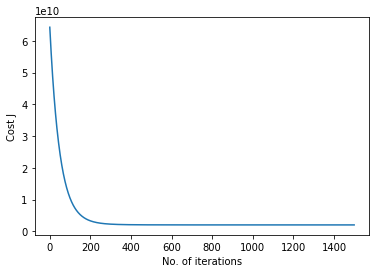


 predict cost of a 1650 sq. feet house with 3 bedrooms 293098.466676


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#soh contain data of first column
#nob contain data of second column
#price contain data of third column
#COST contain cost for each iteration in Gradient Descent
#t1 stores value of theta1
#t2 stores value of theta2
#t3 stores value of theta3
#means store value of mean for each column
#std_ds store value of standard deviation for each column

t1 = []
t2 = []
t3 = []
soh = []
nob = []
price = []
theta = [0,0,0]
COST = []
iterations = 1500
alpha = .01
means = []
std_ds = []

#read data from file
soh,nob,price = np.loadtxt("ex1data2.txt",unpack = True,delimiter = ',')

def FeatureNormalize(x):
    means.append(float(x.mean()))
    std_ds.append(float(x.std()))
    
    mean = x.mean()
    std_d = x.std()
    
    for i in range(len(x)):
        x[i] = (x[i] - mean)/std_d

        
#predict value for a given theta and features
def predict(theta,f1,f2,means,std_ds):
    #normalize the given input
    f1 = (f1 - means[0])/(std_ds[0])
    f2 = (f2 - means[1])/(std_ds[1])
    #predict cost
    predicted = theta[0] + theta[1]*f1 + theta[2]*f2
    return predicted


#Cost function which compute cost for a particular theta
def Compute_cost(theta,f1,f2,y):
    cost = 0
    for i in range(len(y)):
        cost = cost + (theta[0] + theta[1]*f1[i] + theta[2]*f2[i] - y[i])*(theta[0] + theta[1]*f1[i] + theta[2]*f2[i] - y[i])
    
    cost = cost/(2*len(y))
    return cost

def cost_function_theta0(theta,m,f1,f2,y):
    pd = 0
    for i in range(m):
        pd = pd + ((theta[0] + theta[1]*f1[i] + theta[2]*f2[i])- y[i])
   
    pd = pd/(m)
    t1.append(float(pd))
    return pd

def cost_function_theta1(theta,m,f1,f2,y):
    pd = 0
    for i in range(m):
        pd = pd + (((theta[0] + theta[1]*f1[i] + theta[2]*f2[i])- y[i])*f1[i])
    
    pd = pd/(m)
    t2.append(float(pd))
    return pd

def cost_function_theta2(theta,m,f1,f2,y):
    pd = 0
    for i in range(m):
        pd = pd + (((theta[0] + theta[1]*f1[i] + theta[2]*f2[i])- y[i])*f2[i])
    
    pd = pd/(m)
    t3.append(float(pd))
    return pd

#batch gradient descent
def Gradient_Descent(theta,m,f1,f2,y,iterations,alpha):
    for i in range(iterations):
        temp0 = theta[0] - alpha*cost_function_theta0(theta,m,f1,f2,y)
        temp1 = theta[1] - alpha*cost_function_theta1(theta,m,f1,f2,y)
        temp2 = theta[2] - alpha*cost_function_theta2(theta,m,f1,f2,y)
        
        theta[0] = temp0
        theta[1] = temp1
        theta[2] = temp2
       
        COST.append(float(Compute_cost([theta[0],theta[1],theta[2]],f1,f2,y)))

m = len(price)

FeatureNormalize(soh)
FeatureNormalize(nob)
Gradient_Descent(theta,m,soh,nob,price,iterations,alpha)

print("\n After ",iterations," iterations values of theta1 theta2 theta3 are :--",theta)
for i in range(len(COST)):
    print(COST[i])


plt.plot(list(range(iterations)),COST)

plt.xlabel("No. of iterations")
plt.ylabel("Cost J")
plt.show()

print("\n predict cost of a 1650 sq. feet house with 3 bedrooms",predict(theta,1650,3,means,std_ds))